In [18]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [4]:
import pandas as pd
data = pd.read_csv("credit_card_fraud.csv")
df1 = data.copy()
df1.head()

trans_date_trans_time                   merchant       category     amt  \
0   2019-01-01 00:00:44  Heller, Gutmann and Zieme    grocery_pos  107.23   
1   2019-01-01 00:00:51             Lind-Buckridge  entertainment  220.11   
2   2019-01-01 00:07:27                  Kiehn Inc    grocery_pos   96.29   
3   2019-01-01 00:09:03                Beier-Hyatt   shopping_pos    7.77   
4   2019-01-01 00:21:32                 Bruen-Yost       misc_pos    6.85   

                       city state      lat      long  city_pop  \
0                    Orient    WA  48.8878 -118.2105       149   
1                Malad City    ID  42.1808 -112.2620      4154   
2                   Grenada    CA  41.6125 -122.5258       589   
3  High Rolls Mountain Park    NM  32.9396 -105.8189       899   
4                   Freedom    WY  43.0172 -111.0292       471   

                                 job         dob  \
0  Special educational needs teacher  1978-06-21   
1        Nature conservation officer  1962-01-19   
2                    Systems analyst  1945-12-21   
3                    Naval architect  1967-08-30   
4          Education officer, museum  1967-08-02   

                          trans_num  merch_lat  merch_long  is_fraud  
0  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0  
1  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0  
2  413636e759663f264aae1819a4d4f231  41.657520 -122.230347         0  
3  8a6293af5ed278dea14448ded2685fea  32.863258 -106.520205         0  
4  f3c43d336e92a44fc2fb67058d5949e3  43.753735 -111.454923         0

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

### DATA CONTENT 

- This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud.
- The dataset contains a total of 339607 rows and 15 Columns. 
- It doesn't present nun values on the first step.
- It contains different important features which are going to explored on the next steps to achieve a better insight. 
- Data Dictionary
-- transdatetrans_time	Transaction DateTime
-- merchant	Merchant Name
-- category	Category of Merchant
-- amt	Amount of Transaction
-- city	City of Credit Card Holder
-- state	State of Credit Card Holder
-- lat	Latitude Location of Purchase
-- long	Longitude Location of Purchase
-- city_pop	Credit Card Holder's City Population
-- job	Job of Credit Card Holder
-- dob	Date of Birth of Credit Card Holder
-- trans_num	Transaction Number
-- merch_lat	Latitude Location of Merchant
-- merch_long	Longitude Location of Merchant
-- is_fraud	Whether Transaction is Fraud (1) or Not (0)


In [6]:
# Identify the values for ==> is_fraud
df1["is_fraud"].unique()

array([0, 1], dtype=int64)

In [7]:
# Identify the values for ==> merch_long
df1["merch_long"].unique()

array([-118.186462, -112.154481, -122.230347, ...,  -91.333331,
       -119.715054, -117.080888])

In [14]:
# Identify the values for ==> merch_lat
df1["merch_lat"].unique()

array([49.159047, 43.150704, 41.65752 , ..., 39.946837, 46.65834 ,
       44.470525])

In [9]:
# Identify the values for ==> category 
df1["category"].unique()

array(['grocery_pos', 'entertainment', 'shopping_pos', 'misc_pos',
       'shopping_net', 'gas_transport', 'misc_net', 'grocery_net',
       'food_dining', 'health_fitness', 'kids_pets', 'home',
       'personal_care', 'travel'], dtype=object)

In [13]:
# Identify the values for ==> amt
df1["amt"].unique()

array([ 107.23,  220.11,   96.29, ...,  182.18,  146.79, 1309.21])

In [15]:
# check for missing values
total = df1.isnull().sum().sort_values(ascending = False)
percent = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

# there is no missing values in the dataset

trans_date_trans_time  merchant  category  amt  city  state  lat  \
Total                      0.0       0.0       0.0  0.0   0.0    0.0  0.0   
Percent                    0.0       0.0       0.0  0.0   0.0    0.0  0.0   

         long  city_pop  job  dob  trans_num  merch_lat  merch_long  is_fraud  
Total     0.0       0.0  0.0  0.0        0.0        0.0         0.0       0.0  
Percent   0.0       0.0  0.0  0.0        0.0        0.0         0.0       0.0

In [49]:
from datetime import datetime

# Sample DataFrame with DOB column
#data = pd.df1
# Convert DOB column to datetime
df1['dob'] = pd.to_datetime(df1['dob'])

# Calculate age
current_date = datetime.now()
df1['Age'] = (current_date - df1['dob']).dt.days // 365  # Age in years

# Display the modified DataFrame
print(df1)

       trans_date_trans_time                   merchant        category  \
0        2019-01-01 00:00:44  Heller, Gutmann and Zieme     grocery_pos   
1        2019-01-01 00:00:51             Lind-Buckridge   entertainment   
2        2019-01-01 00:07:27                  Kiehn Inc     grocery_pos   
3        2019-01-01 00:09:03                Beier-Hyatt    shopping_pos   
4        2019-01-01 00:21:32                 Bruen-Yost        misc_pos   
...                      ...                        ...             ...   
339602   2020-12-31 23:57:56             Schmidt-Larkin            home   
339603   2020-12-31 23:58:04  Pouros, Walker and Spence       kids_pets   
339604   2020-12-31 23:59:07            Reilly and Sons  health_fitness   
339605   2020-12-31 23:59:15                  Rau-Robel       kids_pets   
339606   2020-12-31 23:59:24            Breitenberg LLC          travel   

           amt                      city state      lat      long  city_pop  \
0       107.23      

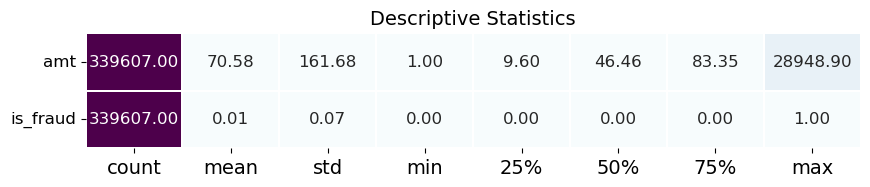

In [39]:
# statistical summary:
cols = df1[["amt","trans_date_trans_time","is_fraud"]]
cmap1 = 'BuPu'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

In [37]:
# correlation matrix
corr = df1.corr()
corr.style.background_gradient(cmap='BuPu')

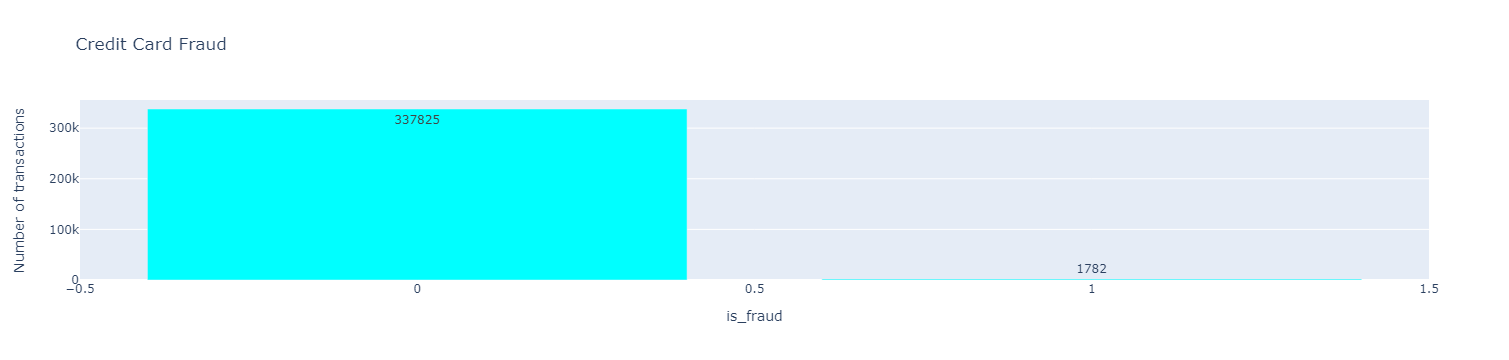

In [28]:
# check for class imbalance

temp = df1["is_fraud"].value_counts()
df_p = pd.DataFrame({'is_fraud': temp.index,'values': temp.values})

trace = go.Bar(
    x = df_p['is_fraud'],y = df_p['values'],
    name="Credit Card Fraud  - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="#00FFFF"),
    text=df_p['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud',
          xaxis = dict(title = 'is_fraud', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='is_fraud')

In [25]:
# making Hour feature from Time feature 
df1["trans_date_trans_time"] = pd.to_datetime(df1["trans_date_trans_time"])  # Convert to datetime
df1["Hour"] = df1["trans_date_trans_time"].apply(lambda x: x.hour)  # Extract hour

DATA VISUALISATION 

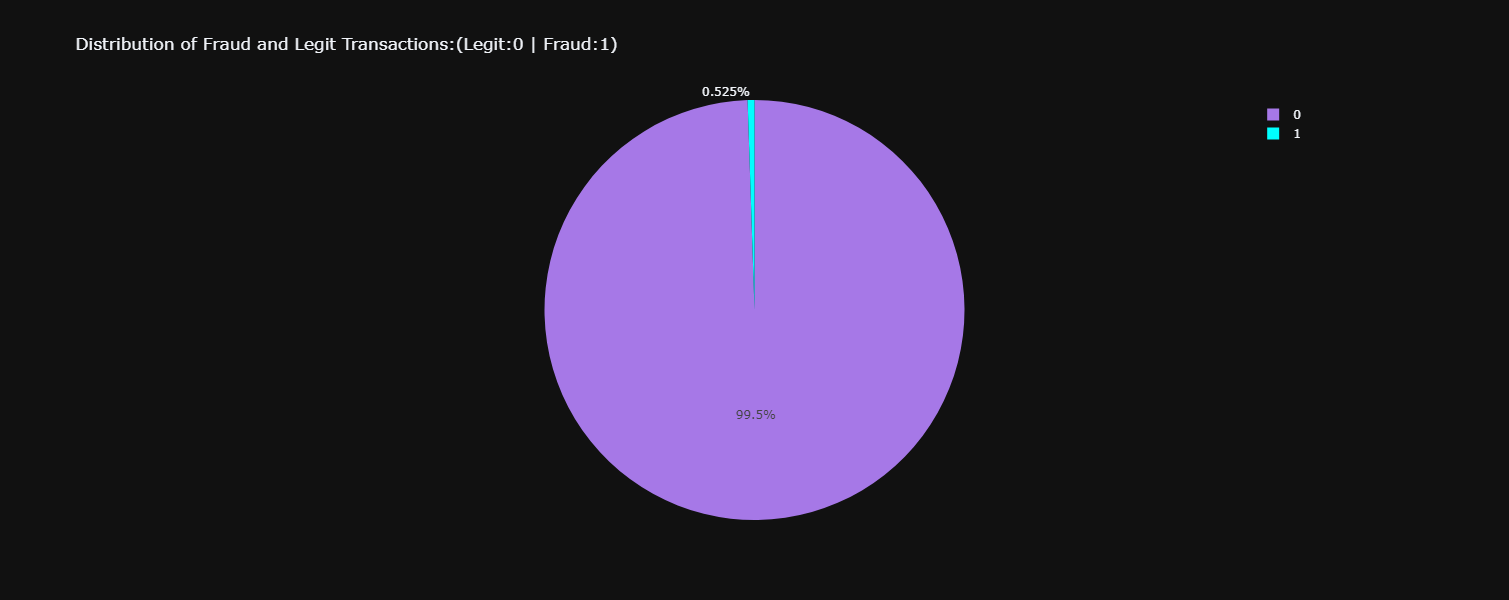

In [27]:
# Distribution of Fraud and Legit Transactions

px.pie(df1, names="is_fraud", title="Distribution of Fraud and Legit Transactions:(Legit:0 | Fraud:1)", color_discrete_sequence=['#A678E7', '#00FFFF'],
       template="plotly_dark", width=800, height=600)

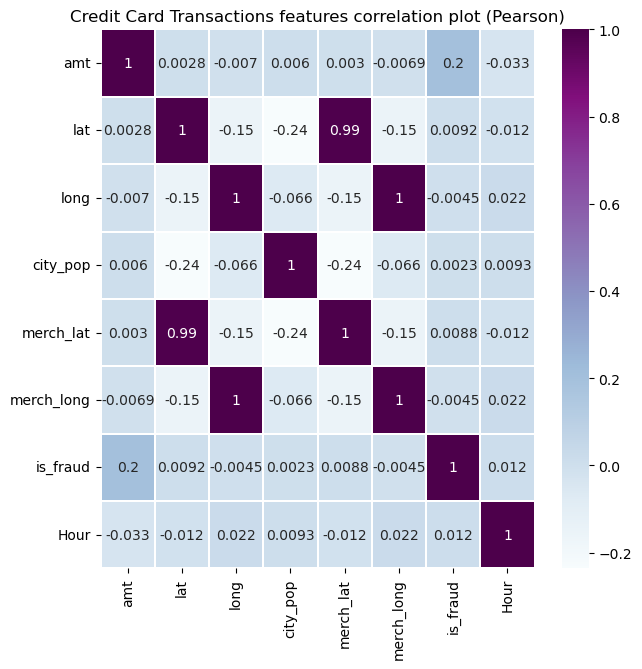

In [42]:
# correlation heatmap:
plt.figure(figsize = (7,7))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df1.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="BuPu", annot)
plt.show()

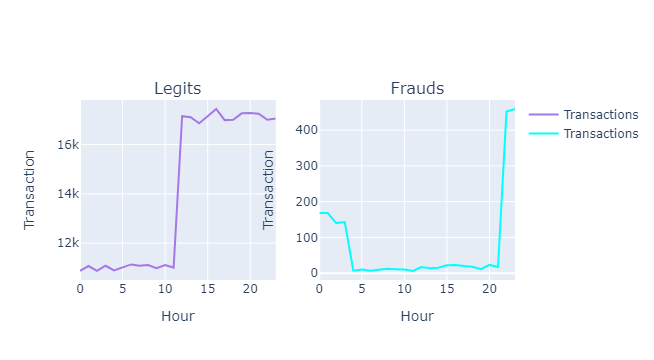

In [43]:
# time vs fraud

# Transaction count with non frauds over time(Hour)
count_0 = df1[df1['is_fraud']==0].groupby('Hour').count()["is_fraud"]

# Transaction count with frauds over time(Hour)
count_1 = df1[df1['is_fraud']==1].groupby('Hour').count()["is_fraud"]

# Concatenate
counts_df = pd.concat([count_0, count_1], axis=1, keys=["is_fraud 0", "is_fraud 1"]).fillna(0)
df_counts = counts_df.reset_index()


# Subplots
fig = make_subplots(
    rows=1, cols=2,

    subplot_titles=("Legits","Frauds"))


fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["is_fraud 0"], name="Transactions", marker = {'color' : "#A678E7"}),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["is_fraud 1"], name="Transactions", marker = {'color' : "#00FFFF"}),
                 row=1, col=2)

fig['layout']['xaxis']['title']='Hour'
fig['layout']['yaxis']['title']='Transaction'
fig['layout']['xaxis2']['title']='Hour'
fig['layout']['yaxis2']['title']='Transaction'

fig.show()

DATA PROCESSING 

In [44]:
X=df1.drop(["is_fraud"],axis=1).values
y=df1["is_fraud"].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
# standardization of data

numerical_columns = X_train.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'